# EDA - Exploratory Data Analysis
> 1. Understand the Data
> 2. Clean The Data
> 3. Data Reduction & Transformation
> 4. Analyse relationship between Variables

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
data = pd.read_csv('./tradhist.csv')

C:\Users\poosh\AppData\Local\Temp\ipykernel_5444\2339283383.py:1: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./tradhist.csv')


#### 1. Understanding Data:
> - Head
> - Tail
> - Description
> - Shape
> - Unique
> - Categoricals Unique
> - ANOVA

In [3]:
data.head()

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
0,0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
2502422,2502422,ZWE,ZMB,2010,46558256.0,NaN,DOTS_IP,6.097825e+09,WDI,1.311544e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502423,2502423,ZWE,ZMB,2011,55171376.0,NaN,DOTS_IP,6.838230e+09,WDI,1.464204e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502424,2502424,ZWE,ZMB,2012,58787336.0,NaN,DOTS_IP,7.845171e+09,WDI,1.614464e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502425,2502425,ZWE,ZMB,2013,77869780.0,NaN,DOTS_IP,8.629172e+09,WDI,1.793963e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502426,2502426,ZWE,ZMB,2014,62405360.0,NaN,DOTS_IP,8.627889e+09,WDI,1.649053e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
display(data.shape)
data.describe()

(2502427, 64)

,Unnamed: 0,year,FLOW,FLOW_0,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
count,2.502427e+06,2.502427e+06,1.899690e+06,595667.0,1.947031e+06,2.011756e+06,1.277366e+06,1.276630e+06,1.325128e+06,1.323024e+06,...,2.499427e+06,2.499424e+06,1.387304e+06,1.491172e+06,1.790388e+06,1.790390e+06,1.870927e+06,1.870929e+06,2.139318e+06,2.139319e+06
mean,1.251213e+06,1.972610e+03,8.368942e+07,0.0,7.901393e+10,7.862344e+10,1.839093e+01,2.730062e+01,1.859886e+01,2.749976e+01,...,2.189486e-01,1.913761e-02,5.762091e+04,6.493432e+04,1.415632e-01,1.449757e-01,7.444705e-02,7.580138e-02,5.065993e-01,5.341190e-01
std,7.223886e+05,3.388806e+01,1.460522e+09,0.0,4.476308e+11,4.454358e+11,1.546463e+01,1.247152e+01,1.547702e+01,1.249422e+01,...,4.135338e-01,1.370086e-01,1.888845e+06,2.001549e+06,3.486016e-01,3.520764e-01,2.624971e-01,2.646801e-01,4.999566e-01,4.988346e-01
min,0.000000e+00,1.827000e+03,0.000000e+00,0.0,1.500000e+06,1.500000e+06,3.217556e-02,0.000000e+00,3.217556e-02,0.000000e+00,...,0.000000e+00,0.000000e+00,5.228638e-13,5.228638e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.256065e+05,1.957000e+03,0.000000e+00,0.0,4.948995e+08,5.150181e+08,5.396186e+00,1.870416e+01,5.509406e+00,1.890694e+01,...,0.000000e+00,0.000000e+00,8.168028e-03,8.156586e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.251213e+06,1.979000e+03,1.264995e+04,0.0,2.535673e+09,2.649044e+09,1.439070e+01,2.570742e+01,1.480852e+01,2.579837e+01,...,0.000000e+00,0.000000e+00,7.057479e-02,7.085948e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.876820e+06,1.998000e+03,1.279859e+06,0.0,1.763358e+10,1.777326e+10,2.800503e+01,3.331938e+01,2.854489e+01,3.336890e+01,...,0.000000e+00,0.000000e+00,2.963839e-01,2.976192e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.502426e+06,2.014000e+03,2.836604e+11,0.0,1.065877e+13,1.065877e+13,9.397742e+01,9.673610e+01,9.397742e+01,9.673610e+01,...,1.000000e+00,1.000000e+00,8.626643e+07,8.626643e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
data.nunique()

Unnamed: 0    2502427
iso_o             325
iso_d             325
year              188
FLOW           787987
               ...   
OECD_d              2
EU_o                2
EU_d                2
GATT_o              2
GATT_d              2
Length: 64, dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'iso_o', 'iso_d', 'year', 'FLOW', 'FLOW_0', 'SOURCE_TF',
       'GDP_o', 'SOURCE_GDP_o', 'GDP_d', 'SOURCE_GDP_d', 'SH_PRIM_o',
       'SOURCE_SH_PRIM_o', 'SH_SECD_o', 'SOURCE_SH_SECD_o', 'SH_PRIM_d',
       'SOURCE_SH_PRIM_d', 'SH_SECD_d', 'SOURCE_SH_SECD_d', 'POP_o', 'POP_d',
       'SOURCE_POP_o', 'SOURCE_POP_d', 'IPTOT_o', 'SOURCE_IPTOT_o', 'IPTOT_d',
       'SOURCE_IPTOT_d', 'XPTOT_o', 'SOURCE_XPTOT_o', 'XPTOT_d',
       'SOURCE_XPTOT_d', 'BITARIFF', 'TARIFF_o', 'SOURCE_TARIFF_o', 'TARIFF_d',
       'SOURCE_TARIFF_d', 'Distw', 'Dist_coord', 'Dist_o', 'Dist_d',
       'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol', 'Metro',
       'Colo', 'Curcol_o', 'Curcol_d', 'Evercol', 'XCH_RATE_o', 'SOURCE_XCH_o',
       'XCH_RATE_d', 'SOURCE_XCH_d', 'CONTI_o', 'CONTI_d', 'REGIO_o',
       'REGIO_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d'],
      dtype='object')

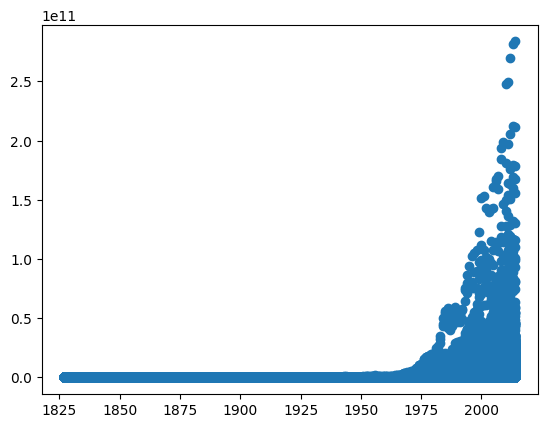

In [8]:
plt.scatter(data["year"], data["FLOW"])

#### 2. Clean The Data

> - Detect Null Values
> - Fill in Missing Values
>   - Drop Row
>   - Impute Values (Zero , Mean)
>   - Replace Values
> - Detect Outliers
>   - Histogram/Box Plot
>   - Robust Z score
>   - IQR Method
>   - Clustering
> - Treat Outliers
>   - Remove Outlier
>   - Impute Outlier (Zero , Mean)
>   - Scalling
>   - Log Transformation
>   - Cube Root Normalization
>   - Box Cox Transformation


In [47]:
data.isnull().sum()

Unnamed: 0         0
iso_o           1501
iso_d           1502
year               0
FLOW          602737
               ...  
OECD_d        712037
EU_o          631500
EU_d          631498
GATT_o        363109
GATT_d        363108
Length: 64, dtype: int64

<AxesSubplot: >

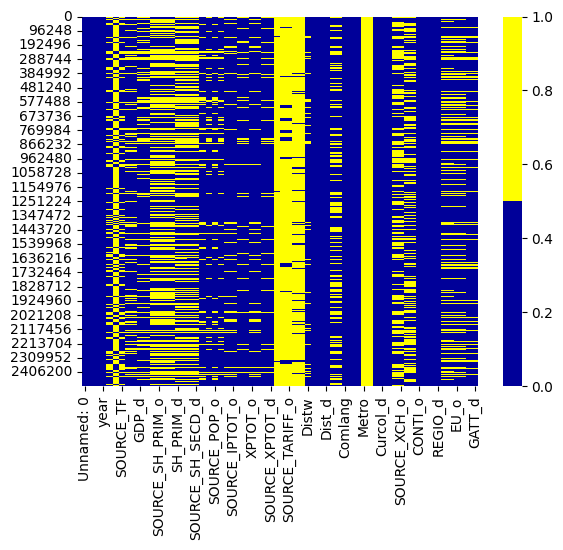

In [10]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

In [50]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    if pct_missing<0.25 and pct_missing>0.01:
        print('{} - {}%'.format(col, round(pct_missing*100)))

FLOW - 24%
SOURCE_TF - 24%
GDP_o - 22%
SOURCE_GDP_o - 22%
GDP_d - 20%
SOURCE_GDP_d - 20%
POP_o - 13%
POP_d - 11%
SOURCE_POP_o - 13%
SOURCE_POP_d - 11%
IPTOT_o - 11%
SOURCE_IPTOT_o - 11%
IPTOT_d - 8%
SOURCE_IPTOT_d - 8%
XPTOT_o - 10%
SOURCE_XPTOT_o - 10%
XPTOT_d - 8%
SOURCE_XPTOT_d - 8%
Distw - 8%
GATT_o - 15%
GATT_d - 15%


### Looking at the Null Values:
Setting threshold : 25% 

Drop columns :
-   FLOW_0 - 76%
-   SH_PRIM_o - 49%
-   SOURCE_SH_PRIM_o - 49%
-   SH_SECD_o - 49%
-   SOURCE_SH_SECD_o - 49%
-   SH_PRIM_d - 47%
-   SOURCE_SH_PRIM_d - 47%
-   SH_SECD_d - 47%
-   SOURCE_SH_SECD_d - 47%
-   BITARIFF - 100%
-   TARIFF_o - 94%
-   SOURCE_TARIFF_o - 94%
-   TARIFF_d - 94%
-   SOURCE_TARIFF_d - 94%
-   SeaDist_SHRT - 37%
-   SeaDist_2CST - 37%
-   Metro - 99%
-   Colo - 99%
-   XCH_RATE_o - 45%
-   SOURCE_XCH_o - 45%
-   XCH_RATE_d - 40%
-   SOURCE_XCH_d - 40%
-   OECD_o - 28%
-   OECD_d - 28%
-   EU_o - 25%
-   EU_d - 25%

Impute Values for :

-   FLOW - 24%
-   SOURCE_TF - 24%
-   GDP_o - 22%
-   SOURCE_GDP_o - 22%
-   GDP_d - 20%
-   SOURCE_GDP_d - 20%
-   POP_o - 13%
-   POP_d - 11%
-   SOURCE_POP_o - 13%
-   SOURCE_POP_d - 11%
-   IPTOT_o - 11%
-   SOURCE_IPTOT_o - 11%
-   IPTOT_d - 8%
-   SOURCE_IPTOT_d - 8%
-   XPTOT_o - 10%
-   SOURCE_XPTOT_o - 10%
-   XPTOT_d - 8%
-   SOURCE_XPTOT_d - 8%
-   Distw - 8%
-   GATT_o - 15%
-   GATT_d - 15%

In [54]:
data = data.drop(columns=['SOURCE_SH_PRIM_o','FLOW_0','SH_PRIM_o','SH_SECD_o','SOURCE_SH_SECD_o','SH_PRIM_d','SOURCE_SH_PRIM_d','SH_SECD_d','SOURCE_SH_SECD_d','BITARIFF','TARIFF_o','SOURCE_TARIFF_o','TARIFF_d','SOURCE_TARIFF_d','SeaDist_SHRT','SeaDist_2CST','Metro','Colo','XCH_RATE_o','SOURCE_XCH_o','XCH_RATE_d','SOURCE_XCH_d','OECD_o','OECD_d','EU_o','EU_d'])

In [55]:
display(data.select_dtypes(include=["float", 'int']).columns)
display(data.columns)

Index(['Unnamed: 0', 'year', 'FLOW', 'GDP_o', 'GDP_d', 'POP_o', 'POP_d',
       'IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'Distw', 'Dist_coord',
       'Dist_o', 'Dist_d', 'Comlang', 'Contig', 'Curcol', 'Curcol_o',
       'Curcol_d', 'Evercol', 'GATT_o', 'GATT_d'],
      dtype='object')

Index(['Unnamed: 0', 'iso_o', 'iso_d', 'year', 'FLOW', 'SOURCE_TF', 'GDP_o',
       'SOURCE_GDP_o', 'GDP_d', 'SOURCE_GDP_d', 'POP_o', 'POP_d',
       'SOURCE_POP_o', 'SOURCE_POP_d', 'IPTOT_o', 'SOURCE_IPTOT_o', 'IPTOT_d',
       'SOURCE_IPTOT_d', 'XPTOT_o', 'SOURCE_XPTOT_o', 'XPTOT_d',
       'SOURCE_XPTOT_d', 'Distw', 'Dist_coord', 'Dist_o', 'Dist_d', 'Comlang',
       'Contig', 'Curcol', 'Curcol_o', 'Curcol_d', 'Evercol', 'CONTI_o',
       'CONTI_d', 'REGIO_o', 'REGIO_d', 'GATT_o', 'GATT_d'],
      dtype='object')

As Visible: 

1. There are rows columns with Non- Numeric data. We need to eliminate those columns, so we can perform imputation on the rest.

2. We select the numeric columns and then remove all rows with strings from it .

3. We remove all rows where Target Value FLOW = 0

In [76]:
num_data = data[['year', 'FLOW', 'GDP_o', 'GDP_d', 'POP_o', 'POP_d','IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'Distw', 'Dist_coord','Dist_o', 'Dist_d', 'Comlang', 'Contig', 'Curcol', 'Curcol_o','Curcol_d', 'Evercol', 'GATT_o', 'GATT_d']].copy()

In [77]:
num_data = num_data.dropna()
num_data = num_data[num_data["FLOW"] != 0]

In [70]:
num_data[num_data.columns].corr()['FLOW'][:]

year          0.060052
FLOW          1.000000
GDP_o         0.190175
GDP_d         0.222507
POP_o         0.091682
POP_d         0.080583
IPTOT_o       0.220319
IPTOT_d       0.243135
XPTOT_o       0.232888
XPTOT_d       0.229597
Distw        -0.041758
Dist_coord   -0.040816
Dist_o        0.080572
Dist_d        0.091755
Comlang       0.021985
Contig        0.110101
Curcol       -0.001769
Curcol_o     -0.014435
Curcol_d     -0.014218
Evercol       0.025409
GATT_o        0.033911
GATT_d        0.040373
Name: FLOW, dtype: float64

Taking Variables / Attributes with highest absolute Corelation effecting the target value.

* year
* Dist_d
* GDP_o
* GDP_d
* IPTOT_o
* IPTOT_d
* XPTOT_o
* XPTOT_d
* Contig

Hence:

We can impute median values for :
- POP_o
- POP_d
- IPTOT_o
- IPTOT_d
- XPTOT_d
- Dist_coord
- Dist_o
- Dist_w
- Curcol
- Curcol_o
- Curcol_d
- Evercol
- GATT_o
- GATT_d

For the rest , we drop any row with Non - numeric or Null value.


In [121]:
num_data = data[['iso_d','year', 'FLOW', 'GDP_o', 'GDP_d', 'POP_o', 'POP_d','IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'Distw', 'Dist_coord','Dist_o', 'Dist_d', 'Comlang', 'Contig', 'Curcol', 'Curcol_o','Curcol_d', 'Evercol', 'GATT_o', 'GATT_d']].copy()
num_data = num_data[num_data["FLOW"] != 0]

display(num_data.describe())

num_imp = ['year', 'FLOW', 'GDP_o', 'GDP_d', 'IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'Dist_d', 'Contig',]
for i in num_imp:
    num_data = num_data[pd.to_numeric(num_data[i], errors='coerce').notnull()]

num_fill = ['POP_o','POP_d','IPTOT_o','IPTOT_d','XPTOT_d','Dist_coord','Dist_o','Distw','Curcol','Curcol_o','Curcol_d','Evercol','GATT_o','GATT_d']
for i in num_fill:
    num_data[i].fillna(data[i].median(), inplace=True)

num_data = num_data.dropna()
num_data.describe()


,year,FLOW,GDP_o,GDP_d,POP_o,POP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,...,Dist_o,Dist_d,Comlang,Contig,Curcol,Curcol_o,Curcol_d,Evercol,GATT_o,GATT_d
count,1.700774e+06,1.098037e+06,1.341260e+06,1.398235e+06,1.492572e+06,1.530442e+06,1.501519e+06,1.571221e+06,1.509490e+06,1.579947e+06,...,1.697178e+06,1.697483e+06,1.697771e+06,1.697771e+06,1.697771e+06,1.697775e+06,1.697774e+06,1.697771e+06,1.405428e+06,1.405429e+06
mean,1.972517e+03,1.447893e+08,1.084265e+11,1.042648e+11,3.523744e+04,3.385455e+04,1.976088e+10,1.899707e+10,1.948913e+10,1.876899e+10,...,2.827254e+02,2.838283e+02,1.744322e-01,2.538093e-02,1.104743e-02,2.127797e-01,1.919083e-01,2.619435e-02,5.499065e-01,5.802171e-01
std,3.712235e+01,1.918756e+09,5.327584e+11,5.242539e+11,1.196114e+05,1.147405e+05,7.925913e+10,7.786485e+10,7.475565e+10,7.343321e+10,...,3.341553e+02,3.292842e+02,3.794809e-01,1.572792e-01,1.045246e-01,4.092732e-01,3.938015e-01,1.597129e-01,4.975033e-01,4.935234e-01
min,1.827000e+03,2.368681e-08,1.500000e+06,1.500000e+06,4.433000e+00,4.433000e+00,6.498229e-03,6.498229e-03,4.600374e-03,4.600374e-03,...,3.780070e-01,3.780070e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.958000e+03,5.973500e+04,6.564952e+08,6.163921e+08,1.645846e+03,2.146662e+03,8.239046e+07,8.919519e+07,5.226431e+07,5.944663e+07,...,7.414110e+01,7.986247e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.983000e+03,6.869364e+05,3.817304e+09,3.464464e+09,6.489300e+03,6.732000e+03,7.271596e+08,6.694775e+08,4.808910e+08,4.421005e+08,...,1.790525e+02,1.828386e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.000000e+03,8.161210e+06,3.065794e+10,2.709981e+10,2.277409e+04,2.273706e+04,6.301539e+09,5.612372e+09,5.392702e+09,4.785703e+09,...,3.558380e+02,3.714088e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.014000e+03,2.836604e+11,1.065877e+13,1.065877e+13,1.364270e+06,1.364270e+06,1.450988e+12,1.450988e+12,1.439870e+12,1.439870e+12,...,1.853802e+03,1.853802e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,year,FLOW,GDP_o,GDP_d,POP_o,POP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,...,Dist_o,Dist_d,Comlang,Contig,Curcol,Curcol_o,Curcol_d,Evercol,GATT_o,GATT_d
count,869054.000000,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,8.690540e+05,...,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000,869054.000000
mean,1986.433639,1.778103e+08,1.524926e+11,1.486852e+11,4.572380e+04,4.200933e+04,3.132513e+10,3.056580e+10,3.109767e+10,3.038781e+10,...,322.896673,312.101917,0.175982,0.033044,0.002411,0.038391,0.043978,0.025238,0.764414,0.750304
std,26.172471,2.146497e+09,6.314741e+11,6.287416e+11,1.430718e+05,1.365758e+05,9.872152e+10,9.841919e+10,9.320856e+10,9.291580e+10,...,353.925510,347.055574,0.380805,0.178752,0.049039,0.192139,0.205046,0.156847,0.424365,0.432837
min,1827.000000,2.368681e-08,1.500000e+06,1.500000e+06,9.004000e+00,9.004000e+00,6.498229e-03,6.498229e-03,4.600374e-03,4.600374e-03,...,1.880632,1.880632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1976.000000,9.131347e+04,1.832167e+09,1.411170e+09,3.821498e+03,3.318560e+03,5.084141e+08,4.136225e+08,3.536228e+08,2.758226e+08,...,110.876320,103.952690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1994.000000,1.178572e+06,1.021123e+10,8.221960e+09,9.800000e+03,8.846062e+03,3.045882e+09,2.587335e+09,2.239706e+09,1.811082e+09,...,208.232414,199.893933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2005.000000,1.302426e+07,6.713860e+10,6.108686e+10,3.400527e+04,3.045500e+04,1.672193e+10,1.511148e+10,1.689057e+10,1.522078e+10,...,407.518889,400.736532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2014.000000,2.836604e+11,1.065877e+13,1.065877e+13,1.364270e+06,1.364270e+06,1.450988e+12,1.450988e+12,1.439870e+12,1.439870e+12,...,1853.802467,1853.802467,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: xlabel='year'>

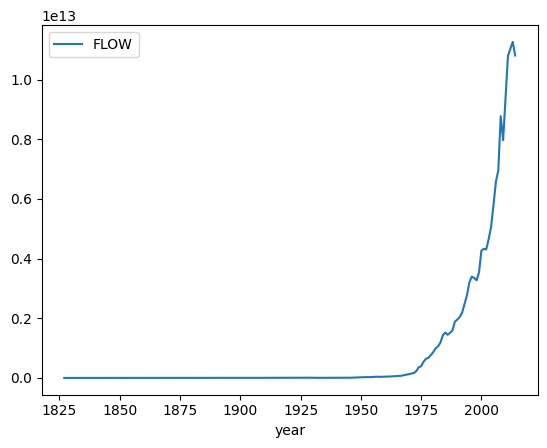

In [113]:
data.groupby('year')['FLOW'].sum().plot(legend=True)

Taking Variables / Attributes with highest absolute Corelation effecting the target value and removinf outliers.

* year
* Dist_d
* GDP_o
* GDP_d
* IPTOT_o
* IPTOT_d
* XPTOT_o
* XPTOT_d
* Contig


NEXT : DETECT OUTLIERS

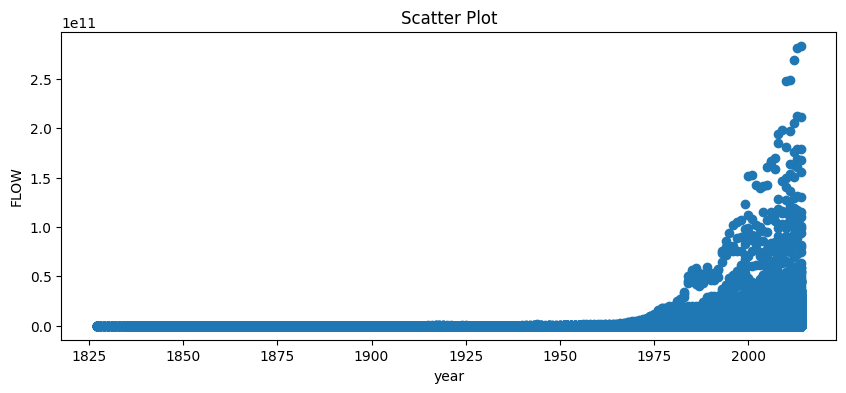

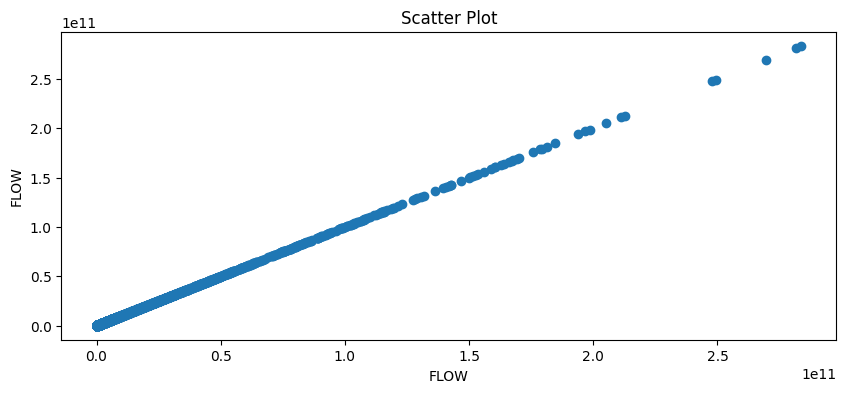

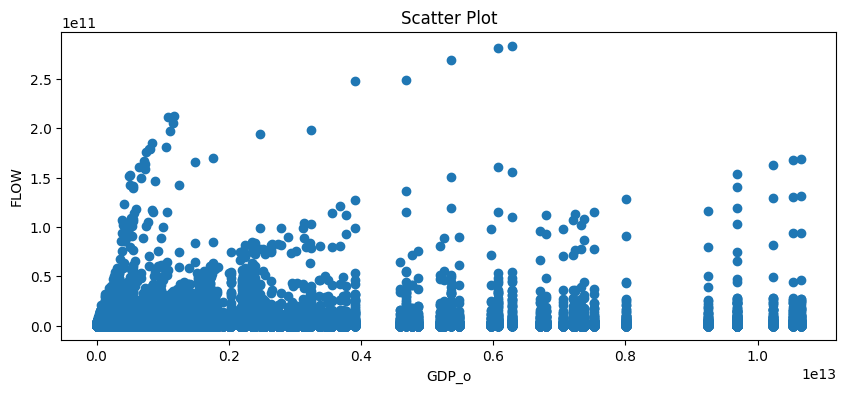

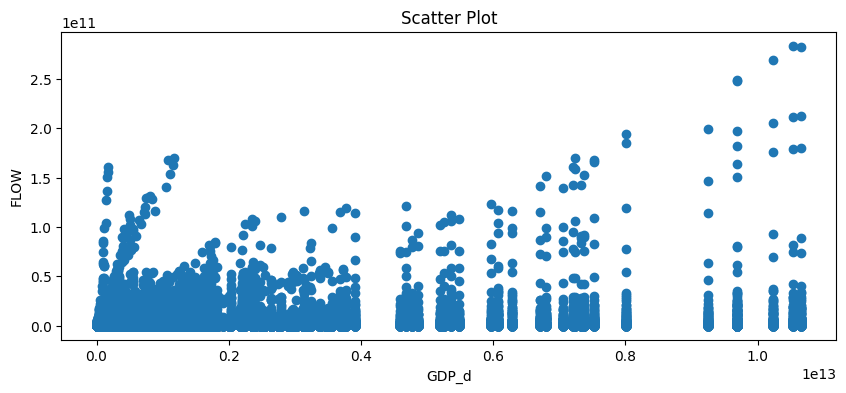

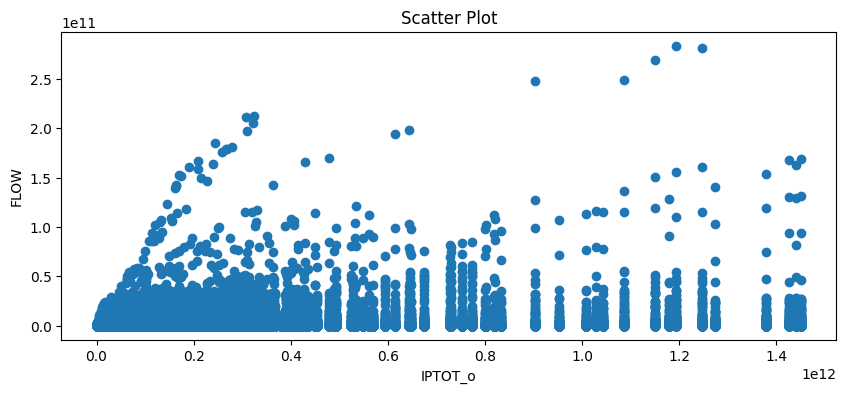

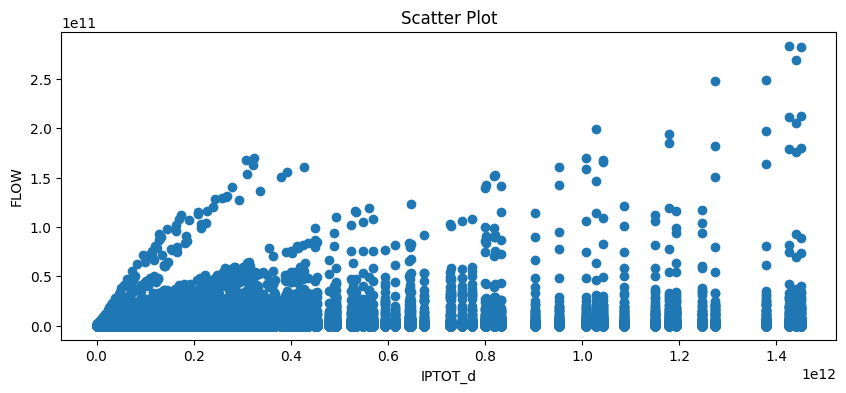

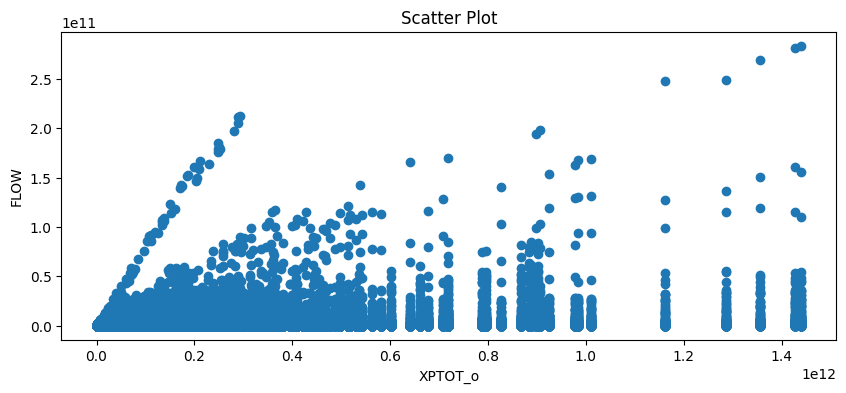

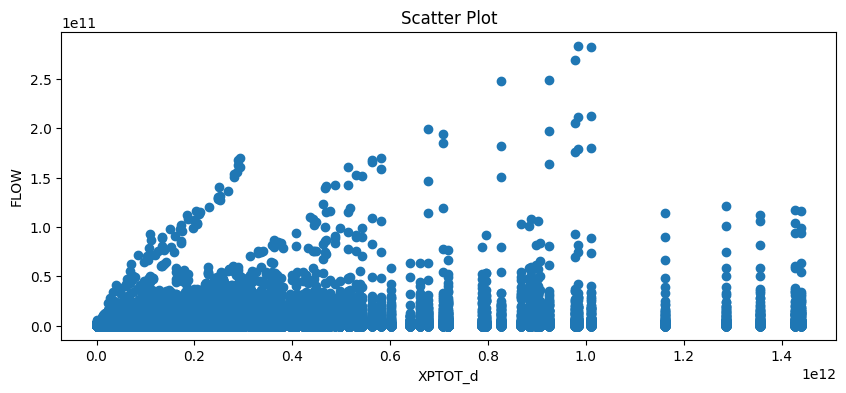

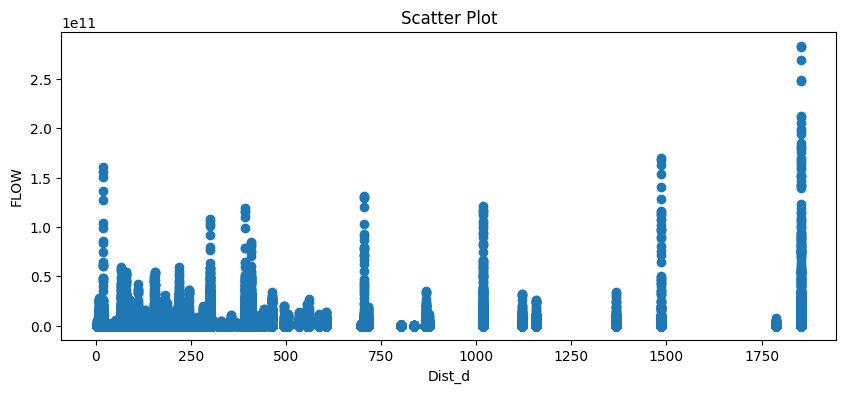

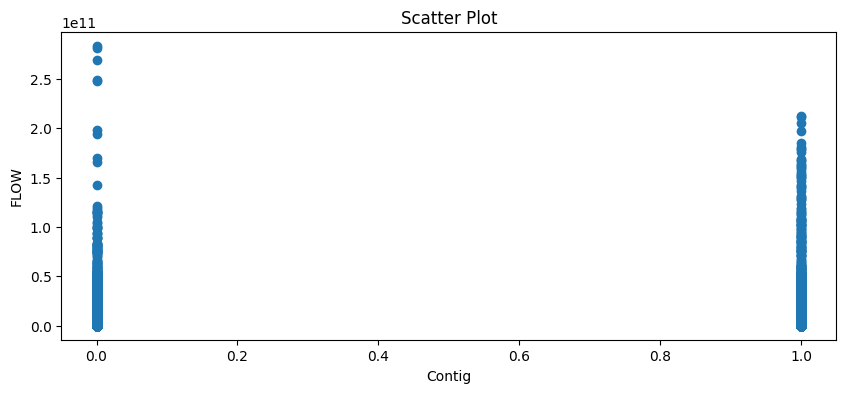

In [90]:
def scatter_plots(df1,df2,i):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel(i)
    ax.set_ylabel('FLOW')
    plt.title("Scatter Plot")
    plt.show()
for i in num_imp:
    scatter_plots(num_data[i],num_data['FLOW'],i)

Remove Outliers for Attributes with high coreltion:

In [124]:
model_data = num_data[['iso_d','year', 'FLOW', 'GDP_o', 'GDP_d', 'IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'Dist_d', 'Contig']]
for i in num_imp[1:9]:
    q_low = model_data[i].quantile(0.05)
    q_hi  = model_data[i].quantile(0.95)

    model_data = model_data[(model_data[i] < q_hi) & (model_data[i] > q_low)]

model_data.describe()

,year,FLOW,GDP_o,GDP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,Dist_d,Contig
count,371868.000000,3.718680e+05,3.718680e+05,3.718680e+05,3.718680e+05,3.718680e+05,3.718680e+05,3.718680e+05,371868.000000,371868.000000
mean,1990.028128,1.376021e+07,3.477424e+10,2.645040e+10,8.063096e+09,6.921674e+09,7.484623e+09,6.403369e+09,244.126866,0.031882
std,16.110172,3.832521e+07,5.625670e+10,4.160389e+10,1.082175e+10,1.003361e+10,1.049641e+10,9.749017e+09,168.635615,0.175687
min,1863.000000,2.202720e+03,1.909187e+08,1.503733e+08,1.028591e+08,9.429123e+07,1.293572e+08,9.779398e+07,25.093539,0.000000
25%,1979.000000,1.095772e+05,3.434755e+09,2.530185e+09,9.345140e+08,7.076615e+08,7.048073e+08,5.088147e+08,119.352546,0.000000
50%,1992.000000,1.073660e+06,1.184603e+10,8.472808e+09,3.414645e+09,2.632308e+09,2.616975e+09,1.869234e+09,199.820547,0.000000
75%,2003.000000,7.580886e+06,3.915282e+10,3.092400e+10,1.028623e+10,8.410750e+09,9.331395e+09,7.451507e+09,354.397505,0.000000
max,2014.000000,3.673096e+08,4.873452e+11,3.585032e+11,6.410942e+10,6.410942e+10,4.730574e+10,4.611763e+10,837.036926,1.000000


C:\Users\poosh\AppData\Local\Temp\ipykernel_5444\3042936545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(model_data.corr(), annot=True, cmap='Blues')


<AxesSubplot: >

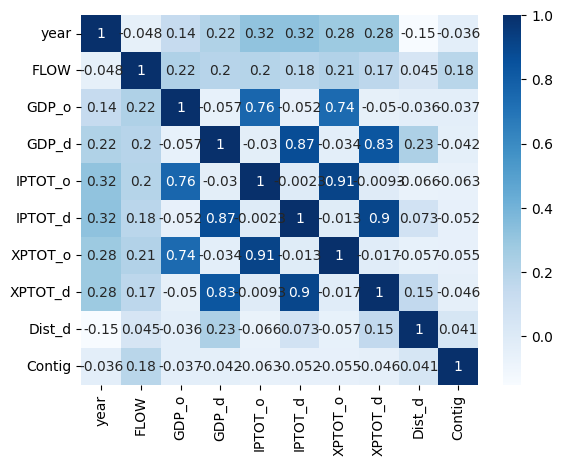

In [125]:
sns.heatmap(model_data.corr(), annot=True, cmap='Blues')

We see correlation between attributes :
- IPTOT_o , XPTOT_o with GDP_o
- IPTOT_d , XPTOT_d with GDP_d
- IPTOT_0 with XPTOT_o
- IPTOT_d with XPTOT_d

- FLOW : GDP_o, GDP_d and XPTOT_o

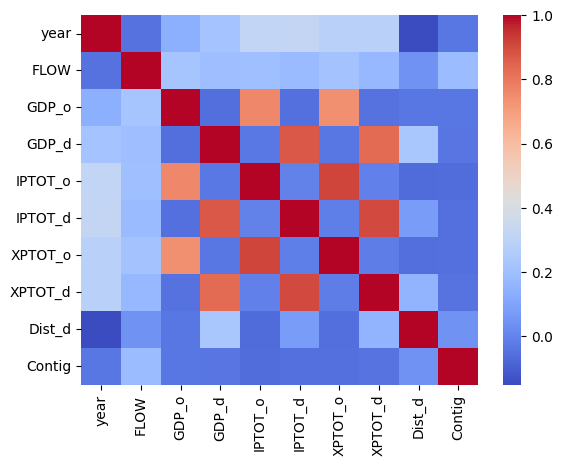

In [102]:
heatmap = sns.heatmap(model_data.corr(), cmap="coolwarm")

Check Trends of Flows in an year.

<AxesSubplot: xlabel='year'>

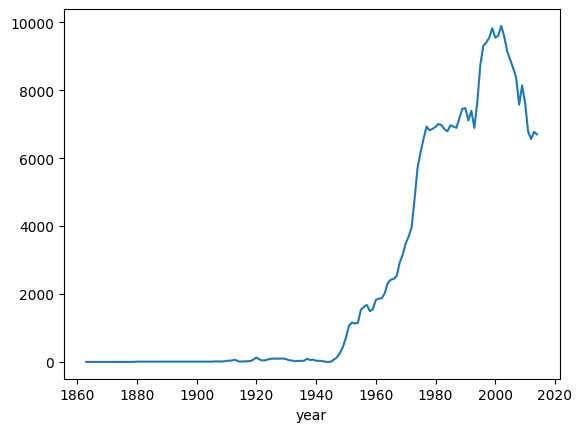

In [108]:
model_data.groupby('year')['FLOW'].count().plot()

iso_d
ABW    AxesSubplot(0.125,0.11;0.775x0.77)
AFG    AxesSubplot(0.125,0.11;0.775x0.77)
AGO    AxesSubplot(0.125,0.11;0.775x0.77)
ALB    AxesSubplot(0.125,0.11;0.775x0.77)
ARE    AxesSubplot(0.125,0.11;0.775x0.77)
                      ...                
YEM    AxesSubplot(0.125,0.11;0.775x0.77)
YUG    AxesSubplot(0.125,0.11;0.775x0.77)
ZAF    AxesSubplot(0.125,0.11;0.775x0.77)
ZMB    AxesSubplot(0.125,0.11;0.775x0.77)
ZWE    AxesSubplot(0.125,0.11;0.775x0.77)
Name: FLOW, Length: 166, dtype: object

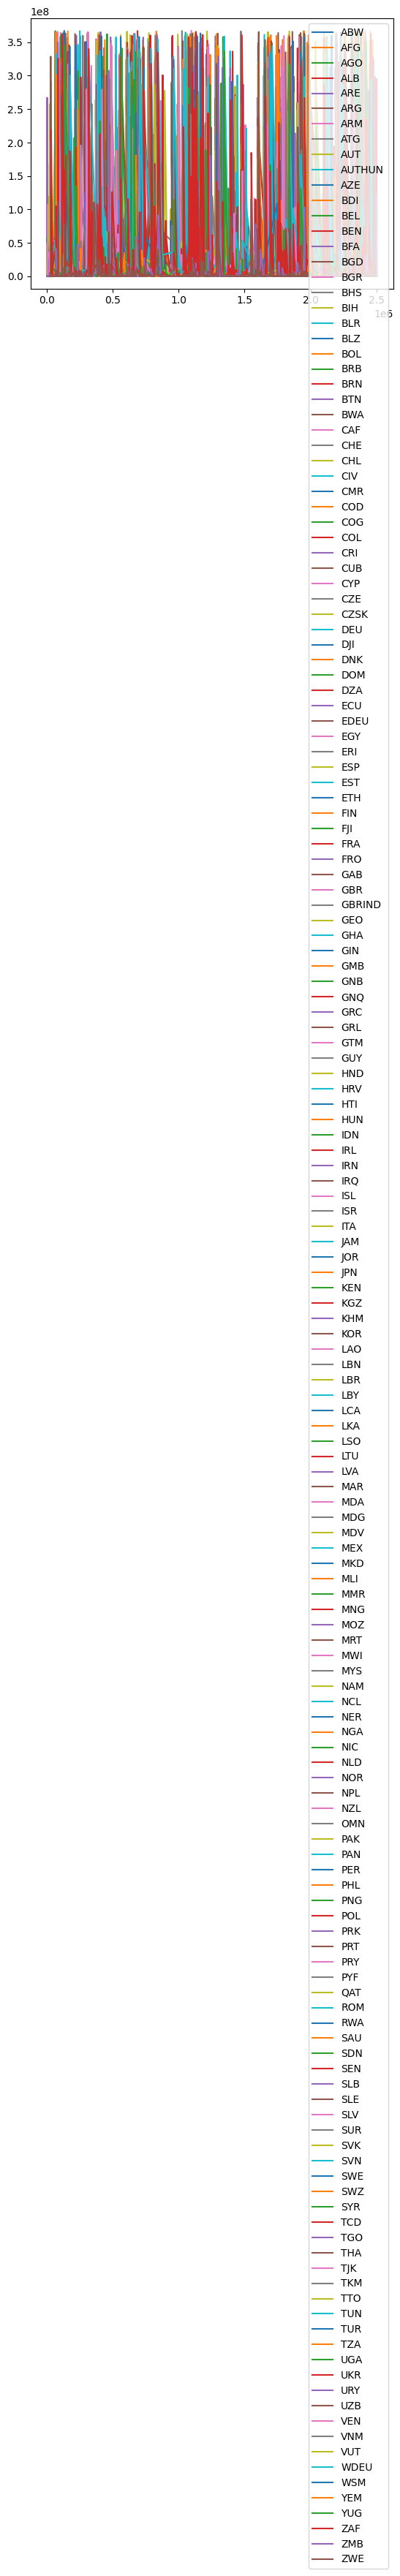

In [129]:
model_data.groupby('iso_d')['FLOW'].plot(legend=True)